# 텐서플로우2 기초

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC4/blob/main/gg-57b-텐서플로우2기초.ipynb"><img src="https://github.com/swkim01/DSAC4/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC4/blob/main/gg-57b-텐서플로우2기초.ipynb"><img src="https://github.com/swkim01/DSAC4/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

# Tensorflow 2.0

# Tensor Manipulation
- from Prof. Sunghun Kim's lecture lab
- modified by jyj, swkim

In [1]:
# https://www.tensorflow.org/api_guides/python/array_ops
import tensorflow as tf
import numpy as np
import pprint
np.random.seed(17)  # for reproducibility

pp = pprint.PrettyPrinter(indent=4)

## Simple Array

In [2]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)
print(t.ndim) # rank
print(t.shape) # shape
print(t[0], t[1], t[-1])
print(t[2:5], t[4:-1])
print(t[:2], t[3:])

[0. 1. 2. 3. 4. 5. 6.]
1
(7,)
0.0 1.0 6.0
[2. 3. 4.] [4. 5.]
[0. 1.] [3. 4. 5. 6.]


# 2D Array

In [3]:
t = np.array([[1., 2., 3.], 
              [4., 5., 6.], 
              [7., 8., 9.], 
              [10., 11., 12.]])
pp.pprint(t)
print(t.ndim) # rank
print(t.shape) # shape

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])
2
(4, 3)


## Shape, Rank, Axis

In [4]:
t1 = tf.constant([1,2,3,4])
t2 = tf.constant([[1,2,3,4]])
print(t1, t1.numpy(), t1.dtype, t1.shape)
print(t2, t2.numpy(), t2.dtype, t2.shape)

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) [1 2 3 4] <dtype: 'int32'> (4,)
tf.Tensor([[1 2 3 4]], shape=(1, 4), dtype=int32) [[1 2 3 4]] <dtype: 'int32'> (1, 4)


In [5]:
t = tf.constant([[1,2],
                 [3,4]])
t

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [6]:
t = tf.constant([[[1, 2, 3, 4], 
                   [5, 6, 7, 8], 
                   [9, 10, 11, 12]],
                  
                  [[13, 14, 15, 16], 
                   [17, 18, 19, 20], 
                   [21, 22, 23, 24]]])
print(tf.shape(t))
t

tf.Tensor([2 3 4], shape=(3,), dtype=int32)


<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

In [7]:
t = tf.constant( \
[
    [
        [
            [1,2,3,4], 
            [5,6,7,8],
            [9,10,11,12]
        ],
        [
            [13,14,15,16],
            [17,18,19,20], 
            [21,22,23,24]
        ]
    ]
])
t

<tf.Tensor: shape=(1, 2, 3, 4), dtype=int32, numpy=
array([[[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]]], dtype=int32)>

## Matmul VS multiply

In [8]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],
                       [2.]])
print(matrix1, matrix2)
tf.matmul(matrix1, matrix2)

tf.Tensor([[3. 3.]], shape=(1, 2), dtype=float32) tf.Tensor(
[[2.]
 [2.]], shape=(2, 1), dtype=float32)


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[12.]], dtype=float32)>

In [9]:
matrix1*matrix2    # broadcasting (be careful when using)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[6., 6.],
       [6., 6.]], dtype=float32)>

## Watch out broadcasting

In [10]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
matrix1+matrix2

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[5., 5.],
       [5., 5.]], dtype=float32)>

In [11]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2., 2.]])
matrix1+matrix2

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[5., 5.]], dtype=float32)>

## Random values for variable initializations 

In [12]:
tf.random.normal([3], mean=0., stddev=1.0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.2737804 , -0.36779764,  0.10092158], dtype=float32)>

In [13]:
tf.random.uniform([2])  # For floats, the default range is [0, 1).  
                        # for ints, at least maxval must be specified explicitly.

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.01930428, 0.7100258 ], dtype=float32)>

In [14]:
tf.random.uniform([2, 3])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.11650038, 0.64350975, 0.04440784],
       [0.751789  , 0.8787507 , 0.76476145]], dtype=float32)>

In [15]:
np.random.uniform(size=(2,3))

array([[0.294665  , 0.53058676, 0.19152079],
       [0.06790036, 0.78698546, 0.65633352]])

In [16]:
tf.round(tf.random.uniform([2, 3]))  # nearest integer

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [1., 0., 0.]], dtype=float32)>

In [17]:
np.round(tf.random.uniform([2, 3]), 3)

array([[0.984, 0.69 , 0.109],
       [0.646, 0.382, 0.171]], dtype=float32)

## Reduce Mean/Sum

In [18]:
np.array([1,2,3]).sum()

6

In [19]:
tf.reduce_sum([1., 2.], axis=0)

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [20]:
x = [[1., 2.],
     [3., 4.]]

print(tf.constant(x))
print(tf.reduce_mean(x))
print(tf.reduce_mean(x, axis=0))
print(tf.reduce_mean(x, axis=1))

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor([2. 3.], shape=(2,), dtype=float32)
tf.Tensor([1.5 3.5], shape=(2,), dtype=float32)


In [21]:
tf.reduce_mean(x, axis=-1)  # 가장 안쪽 axis

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.5, 3.5], dtype=float32)>

In [22]:
tf.reduce_sum(x) , tf.reduce_sum(x, axis=0), tf.reduce_sum(x, axis=-1), tf.reduce_mean(tf.reduce_sum(x, axis=-1))

(<tf.Tensor: shape=(), dtype=float32, numpy=10.0>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([4., 6.], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([3., 7.], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>)

## Argmax with axis

In [23]:
x = [[0, 1, 2],
     [2, 1, 0]]
tf.argmax(x, axis=0)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 0, 0])>

In [24]:
tf.argmax(x, axis=1)

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([2, 0])>

In [25]:
tf.argmax(x, axis=-1)

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([2, 0])>

## Reshape, squeeze, expand_dims

In [26]:
t = np.array([[[0, 1, 2], 
               [3, 4, 5]],
              
              [[6, 7, 8], 
               [9, 10, 11]]])
t.shape

(2, 2, 3)

In [27]:
tf.reshape(t, shape=[-1, 3])

<tf.Tensor: shape=(4, 3), dtype=int64, numpy=
array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])>

In [28]:
tf.reshape(t, shape=[-1, 1, 3])

<tf.Tensor: shape=(4, 1, 3), dtype=int64, numpy=
array([[[ 0,  1,  2]],

       [[ 3,  4,  5]],

       [[ 6,  7,  8]],

       [[ 9, 10, 11]]])>

In [29]:
tf.squeeze([[0], [1], [2]])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 2], dtype=int32)>

In [30]:
tf.expand_dims([0, 1, 2], 0), tf.expand_dims([0, 1, 2], 1)  # axis 추가

(<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[0, 1, 2]], dtype=int32)>,
 <tf.Tensor: shape=(3, 1), dtype=int32, numpy=
 array([[0],
        [1],
        [2]], dtype=int32)>)

## One hot

In [31]:
tf.one_hot([[0], [1], [2], [0]], depth=3) # rank 가 하나 늘어남

<tf.Tensor: shape=(4, 1, 3), dtype=float32, numpy=
array([[[1., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]],

       [[1., 0., 0.]]], dtype=float32)>

In [32]:
t = tf.one_hot([[0], [1], [2], [0]], depth=3)
tf.reshape(t, shape=[-1, 3])

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>

## casting

In [33]:
tf.cast([1.8, 2.2, 3.3, 4.9], tf.int32)   # type 변경

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [34]:
print([True, False, 1 == 1, 0 == 1])
tf.cast([True, False, 1 == 1, 0 == 1], tf.int32)  # True->1, False->0

[True, False, True, False]


<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 0, 1, 0], dtype=int32)>

## Stack

In [35]:
x = [1, 4]
y = [2, 5]
z = [3, 6]

# Pack along first dim.
tf.stack([x, y, z], axis=0)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int32)>

In [36]:
tf.stack([x, y, z], axis=1)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

## Ones like and Zeros like

In [37]:
x = [[0, 1, 2],
     [2, 1, 0]]

tf.ones_like(x)  # 모양이 같게

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)>

In [38]:
tf.zeros_like(x)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)>

## Zip

In [39]:
for x, y in zip([1, 2, 3], [4, 5, 6]):   # zip is iterable
    print(x, y)

1 4
2 5
3 6


In [40]:
for x, y, z in zip([1, 2, 3], [4, 5, 6], [7, 8, 9]):
    print(x, y, z)

1 4 7
2 5 8
3 6 9


## Transpose

In [41]:
t = np.array([[[0, 1, 2], [3, 4, 5]], [[6, 7, 8], [9, 10, 11]]])
pp.pprint(t.shape)
pp.pprint(t)

(2, 2, 3)
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])


In [42]:
t1 = tf.transpose(t, [1, 0, 2])
pp.pprint(t1.shape)
pp.pprint(t1)

TensorShape([2, 2, 3])
<tf.Tensor: shape=(2, 2, 3), dtype=int64, numpy=
array([[[ 0,  1,  2],
        [ 6,  7,  8]],

       [[ 3,  4,  5],
        [ 9, 10, 11]]])>


In [43]:
t = tf.transpose(t1, [1, 0, 2])
pp.pprint(t.shape)
pp.pprint(t)

TensorShape([2, 2, 3])
<tf.Tensor: shape=(2, 2, 3), dtype=int64, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])>


In [44]:
t2 = tf.transpose(t, [1, 2, 0])
pp.pprint(t2.shape)
pp.pprint(t2)

TensorShape([2, 3, 2])
<tf.Tensor: shape=(2, 3, 2), dtype=int64, numpy=
array([[[ 0,  6],
        [ 1,  7],
        [ 2,  8]],

       [[ 3,  9],
        [ 4, 10],
        [ 5, 11]]])>


In [45]:
t = tf.transpose(t2, [2, 0, 1])
pp.pprint(t.shape)
pp.pprint(t)

TensorShape([2, 2, 3])
<tf.Tensor: shape=(2, 2, 3), dtype=int64, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])>


# Numpy and Tensorflow

In [46]:
import numpy as np
import tensorflow as tf

In [47]:
tf.__version__

'2.3.1'

In [48]:
print(tf.random.normal([2,5]).numpy())

print(np.random.normal([5]))
print(np.random.normal(1, 1, (2,5)))

[[-0.8531588  -0.63007456 -0.16997477  0.75356805 -0.9810724 ]
 [ 1.0972778  -0.69993186  2.0592444   1.619185   -1.3153608 ]]
[6.03719047]
[[ 2.88663893  0.88830171  0.63789866  1.14867505  0.56221685]
 [ 3.171257    2.15231025 -0.81881234  0.86195066  1.53983961]]


In [49]:
np.random.seed(17)
tf.random.set_seed(17)
print(tf.random.normal([2,3]))
print(np.random.randn(2,3))

tf.Tensor(
[[ 0.01778085  2.3094206  -0.9550922 ]
 [-1.7634274   0.4548187  -0.18493938]], shape=(2, 3), dtype=float32)
[[ 0.27626589 -1.85462808  0.62390111]
 [ 1.14531129  1.03719047  1.88663893]]


In [50]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [51]:
tf.ones([2,3]), tf.ones((2,3))

(<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32)>)

In [52]:
tf.ones((2)).numpy()

array([1., 1.], dtype=float32)

In [53]:
tf.ones((2,)).numpy(), tf.ones((1,2)).numpy()

(array([1., 1.], dtype=float32), array([[1., 1.]], dtype=float32))

In [54]:
tf.ones((1)).numpy(), np.ones(1)

(array([1.], dtype=float32), array([1.]))

In [55]:
tf.constant(3, shape=(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[3, 3, 3],
       [3, 3, 3]], dtype=int32)>

In [56]:
np.array([1,2,3,4]).reshape(2,2)
np.reshape([1,2,3,4], (2,2))

array([[1, 2],
       [3, 4]])

In [57]:
tf.constant([1,2,3,4], shape=[2,2])

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [58]:
t = tf.constant([1,2,3,4])
tf.reshape(t, shape=[2,2])

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [59]:
x = tf.constant([1,2,3,4], shape=[2,2])
tf.zeros_like(x)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 0],
       [0, 0]], dtype=int32)>

In [60]:
tf.fill([3,3], 6)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[6, 6, 6],
       [6, 6, 6],
       [6, 6, 6]], dtype=int32)>

## define and initializing variables

In [61]:
a0 = tf.Variable([1,2,3,4], dtype = tf.float32)
b = tf.constant(2, tf.float32)
a0*b

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([2., 4., 6., 8.], dtype=float32)>

In [62]:
tf.multiply(a0, b) == a0 * b

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [63]:
A2 = tf.constant([[1,2],[3,4]])
B2 = tf.constant([[5,6],[7,8]])
A2 + B2, A2 * B2, tf.add(A2, B2), tf.multiply(A2, B2)  # element-wise

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 6,  8],
        [10, 12]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 5, 12],
        [21, 32]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 6,  8],
        [10, 12]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 5, 12],
        [21, 32]], dtype=int32)>)

In [64]:
tf.matmul(A2, B2)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]], dtype=int32)>

In [65]:
tf.reduce_sum(A2), tf.reduce_sum(A2, axis=0), tf.reduce_sum(A2, axis=1)

(<tf.Tensor: shape=(), dtype=int32, numpy=10>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 7], dtype=int32)>)

## advanced functions

- gradient(), reshape(), random()

In [66]:
x = tf.Variable(-1.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.multiply(x, x)
    
g = tape.gradient(y, x)
g.numpy()

-2.0

In [67]:
gray1 = tf.random.uniform([2,2], maxval=255, dtype='int32')
gray2 = tf.reshape(gray1, [2*2, 1])
gray1, gray2

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 43,  26],
        [195, 222]], dtype=int32)>,
 <tf.Tensor: shape=(4, 1), dtype=int32, numpy=
 array([[ 43],
        [ 26],
        [195],
        [222]], dtype=int32)>)

In [68]:
color = tf.random.uniform([2,2,3], maxval=255, dtype='int32') # color image
tf.reshape(color, [2*2, 3])

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 68, 184, 226],
       [168,  15, 227],
       [246, 254, 103],
       [ 41,  50, 119]], dtype=int32)>

# Tensorflow 2.0
- 커널 재실행 (eager 실행 활성화)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

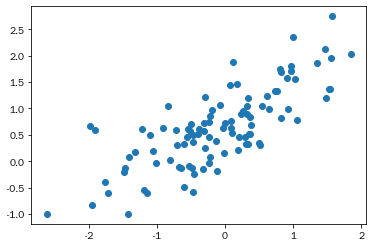

In [25]:
n = 100
np.random.seed(42)
x = np.random.randn(n)
y = 0.7 * x + 0.7    # w = 0.7, b = 0.7
y = y + np.random.randn(n) * 0.5

plt.scatter(x,y)

499 :  0.6295519 0.704174


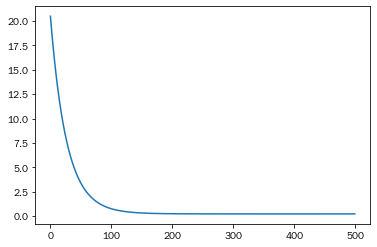

In [7]:
W, b = tf.Variable(5.0), tf.Variable(-1.0)  # randomly chosen

lossHistory = []
learning_rate = 0.01

for i in range(500):
    with tf.GradientTape() as tape:
        y_pred = W * x + b
        cost = tf.reduce_mean(tf.square(y_pred - y))

    W_grad, b_grad = tape.gradient(cost, [W, b])
    # W_grad = tf.reduce_mean((y_pred - y) * x)
    # b_grad = tf.reduce_mean(y_pred - y) 

    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

    lossHistory.append(cost)

print(i, ": ", W.numpy(), b.numpy())
plt.plot(lossHistory)

### Linear Regression using Keras

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.optimizers import SGD

In [15]:
n = 1000
np.random.seed(42)
x = np.random.randn(n)
y = 0.7 * x + 0.7    # w = 0.7, b = 0.7
y = y + np.random.randn(n) * 0.5

model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='linear'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.1), loss=['mse'], metrics=["mae"])
history = model.fit(x, y, epochs=300, verbose=0)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


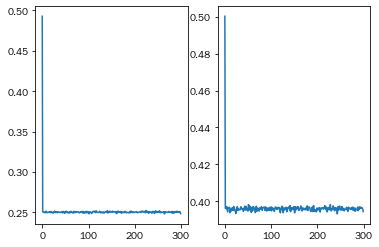

In [16]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['mae'])

In [17]:
model = Sequential()
model.add(Dense(2, input_shape=(1,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.01), loss=['mse'], metrics=["mae"])
history = model.fit(x, y, epochs=1000, verbose=0)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


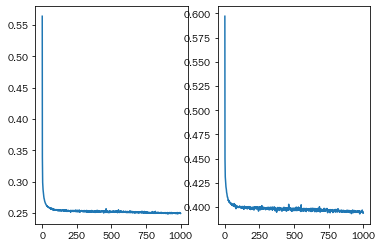

In [18]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['mae'])

# Classification with Keras

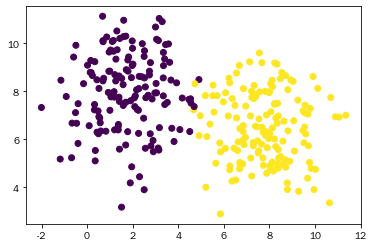

In [19]:
from sklearn.datasets import make_blobs

N = 300
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2,
                    cluster_std=1.5, random_state=20)

plt.scatter(X[:,0], X[:,1], c=y)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


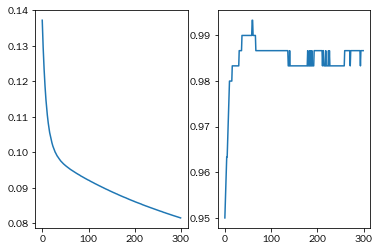

In [20]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.001), 
              loss=['binary_crossentropy'], 
              metrics=["accuracy"])
history = model.fit(X, y, epochs=300, verbose=0)
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

# GradientTape()

In [21]:
x = tf.constant(3.0)

with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        y = x * x
        z = y * y

dz_dx = tape.gradient(z, x)
dy_dx = tape.gradient(y, x)

dz_dx, dy_dx

(<tf.Tensor: shape=(), dtype=float32, numpy=108.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [22]:
dir(tf)

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'TensorShape',
 'TensorSpec',
 'TypeSpec',
 'UnconnectedGradients',
 'Variable',
 'VariableAggregation',
 'VariableSynchronization',
 '_API_MODULE',
 '_LazyLoader',
 '__all__',
 '__builtins__',
 '__cached__',
 '__compiler_version__',
 '__cxx11_abi_flag__',
 '__doc__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__monolithic_build__',
 '__name__',
 '__operators__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_absolute_import',
 '_api',
 '_compat',
 '_current_file_location',
 '_current_module',
 '_distutils',
 '_division',
 '_estimator_module',
 '_fi',
 '_inspect',
 '_ll',
 '_logging',
 '_main_dir',
 '_major_api_version',
 '_module_dir',
 '